# Alignment

This notebook demonstrates a simulated alignment using tike.

In [1]:
%env TIKE_BACKEND=numpy

env: TIKE_BACKEND=numpy


In [2]:
import importlib
import logging

import matplotlib.pyplot as plt
import numpy as np

import tike
import tike.align
import tike.view

In [3]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.9.1.dev64+g0ba5c8f.d20200615
numpy is version 1.18.4


## Create test data

Make test data for the alignment problem.

### Define the object

In [4]:
amplitude = plt.imread("../../../tests/data/Cryptomeria_japonica-0128.png")
phase = plt.imread("../../../tests/data/Bombus_terrestris-0128.png") * np.pi
np.min(phase), np.max(phase)

(0.036959916, 3.1292727)

In [5]:
ntheta = 21  # number angular views
original = np.tile(amplitude * np.exp(1j * phase), (ntheta, 1, 1)).astype('complex64')
original.shape

(21, 128, 128)

(-0.9999241+0.012319642j) (0.99514693+0.09840028j)


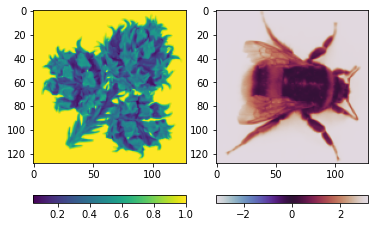

In [6]:
plt.figure()
tike.view.plot_phase(original[0])
plt.show()

### Define the shifts

Each image has a single shift direction in 2 dimensions.

In [7]:
np.random.seed(5)
shift = (np.random.rand(ntheta, 2) - 0.5) * 3
shift

array([[-0.83402049,  1.11219692],
       [-0.87984253,  1.25583272],
       [-0.03476643,  0.33523159],
       [ 0.79772357,  0.05525396],
       [-0.6095985 , -0.93683631],
       [-1.25777619,  0.71532089],
       [-0.17607233, -1.0250704 ],
       [ 1.13981109, -0.67774061],
       [-0.25729494, -0.6117602 ],
       [ 0.38636373,  0.23951343],
       [ 0.29978759, -0.70254265],
       [-0.64594236, -0.73923538],
       [-0.51730816, -1.0675071 ],
       [-1.00316142,  1.39179159],
       [ 1.38068015, -0.93475603],
       [-1.42708032, -0.88633336],
       [ 0.59953084,  0.83854376],
       [-1.43120072,  0.23298857],
       [-1.49507348,  0.04641784],
       [ 0.41938553,  1.45687321],
       [-0.72270721,  0.90749066]])

### Simulate the shifted images

In [8]:
data = tike.align.simulate(shift=shift, unaligned=original)
data.shape

(21, 128, 128)

(-1.2774377+0.046576604j) (1.0071115+0.11877453j)


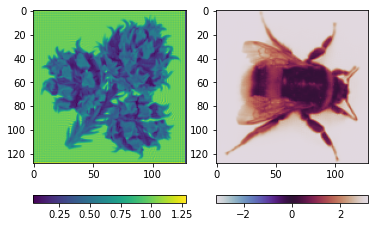

In [9]:
plt.figure()
tike.view.plot_phase(data[ntheta // 2])

## Reconstruct

Now we need to try and reconstruct psi.

In [10]:
# Provide initial guesses for parameters that are updated
result = {
}

In [11]:
logging.basicConfig(level=logging.INFO)

for i in range(1):
    result = tike.align.reconstruct(
        data=data,
        unaligned=original,
        **result,
        num_iter=1,
        upsample_factor=100,
    )

INFO:tike.align.align:direct on 21 - 128 by 128 images for 1 iterations.


In [12]:
result['shift']

array([[-0.83,  1.11],
       [-0.88,  1.26],
       [-0.03,  0.34],
       [ 0.8 ,  0.06],
       [-0.61, -0.94],
       [-1.26,  0.72],
       [-0.18, -1.02],
       [ 1.14, -0.68],
       [-0.26, -0.61],
       [ 0.39,  0.24],
       [ 0.3 , -0.7 ],
       [-0.64, -0.74],
       [-0.52, -1.07],
       [-1.  ,  1.39],
       [ 1.38, -0.93],
       [-1.43, -0.89],
       [ 0.6 ,  0.84],
       [-1.43,  0.23],
       [-1.49,  0.05],
       [ 0.42,  1.46],
       [-0.72,  0.91]], dtype=float32)

In [13]:
shift

array([[-0.83402049,  1.11219692],
       [-0.87984253,  1.25583272],
       [-0.03476643,  0.33523159],
       [ 0.79772357,  0.05525396],
       [-0.6095985 , -0.93683631],
       [-1.25777619,  0.71532089],
       [-0.17607233, -1.0250704 ],
       [ 1.13981109, -0.67774061],
       [-0.25729494, -0.6117602 ],
       [ 0.38636373,  0.23951343],
       [ 0.29978759, -0.70254265],
       [-0.64594236, -0.73923538],
       [-0.51730816, -1.0675071 ],
       [-1.00316142,  1.39179159],
       [ 1.38068015, -0.93475603],
       [-1.42708032, -0.88633336],
       [ 0.59953084,  0.83854376],
       [-1.43120072,  0.23298857],
       [-1.49507348,  0.04641784],
       [ 0.41938553,  1.45687321],
       [-0.72270721,  0.90749066]])